# 2. Data Exploration

In [1]:
%matplotlib inline
import pandas as pd

rh = pd.read_csv("final.csv")
sectors = pd.read_csv("sector_group.csv")

The first thing that I was interested in was which sectors were most popular among Robinhood's users. I grouped the stocks by which Sector table they came from on Robinhood and found the mean number of users that owned a stock in that sector. From the graph below you can see that Tech was the most popular sector while Oil and Gas seemed to be the least popular sector.

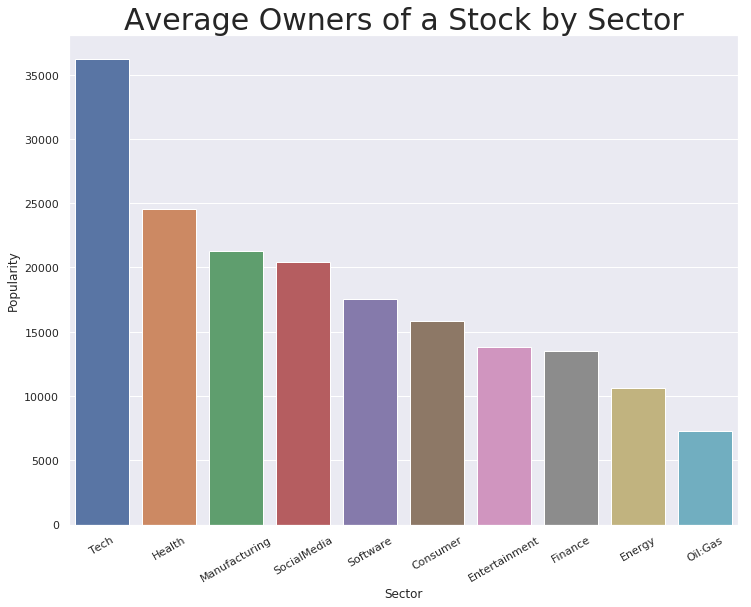

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,9)})
p = sns.barplot(x="Sector", y="Popularity", data=sectors, ci=None,
    order=["Tech", "Health", "Manufacturing", "SocialMedia", "Software",
          "Consumer", "Entertainment", "Finance", "Energy", "Oil:Gas"])
p.axes.set_title("Average Owners of a Stock by Sector",fontsize=30)
for item in p.get_xticklabels():
    item.set_rotation(30)

Then I looked at the price history of the stock to see if Robinhood users tended to choose stocks that have historically done well, at various intervals of time. I grouped together the Top 50 Most Popular stocks on Robinhood and compared the average change to the S&P 500.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,0.98,'Average Return of Robinhood Top 50 vs. S&P 500')

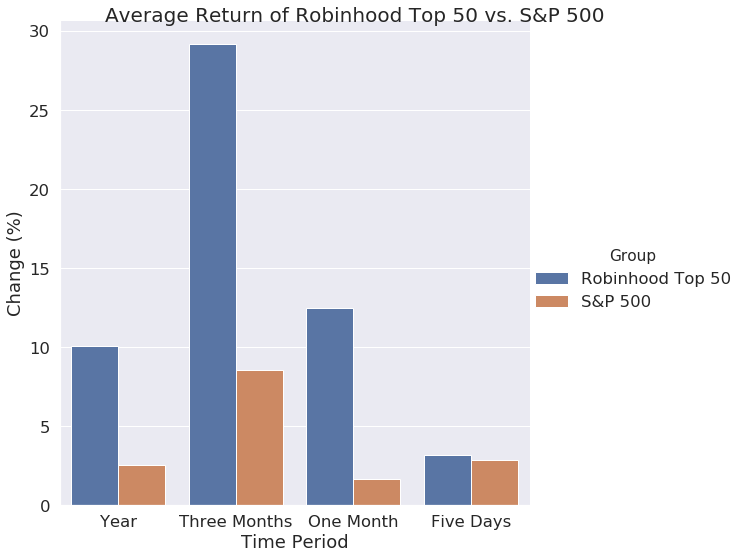

In [3]:
top50 = rh.sort_values("Popularity", ascending=False)[:50]

top50changes = top50[["Year", "Three_Month",
        "Month", "Five_Day"]].mean().tolist()

SP500changes = [2.56, 8.56, 1.69, 2.89]

periods = ["Year", "Three Months", "One Month", "Five Days"]
groups = ["Robinhood Top 50"] * 4 + ["S&P 500"] * 4

changes_dict = {"Group": groups, 
               "Change (%)": top50changes + SP500changes,
               "Time Period": periods*2}

changes = pd.DataFrame(changes_dict)

sns.set(font_scale=1.5)
g = sns.factorplot(x='Time Period', y='Change (%)', hue='Group',
            data=changes, kind='bar', size=8, aspect = 1)
g.fig.suptitle('Average Return of Robinhood Top 50 vs. S&P 500', fontsize=20)

It turned out that the Robinhood Top 50 outperformed the S&P 500 at every interval.

Next, I used the latitude and longitude of company's headquarters to map their locations as well as the popularity of their stock. The more red a dot is on the map, the more popular it was among Robinhood users.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


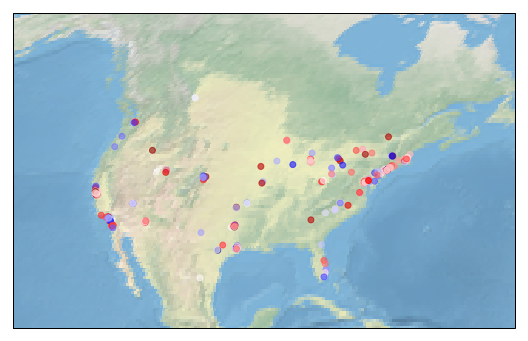

In [4]:
import cartopy.crs as ccrs
from matplotlib import cm
import numpy as np

ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()

rh_dp = rh[rh["Longitude"] > -200]
rh_dp = rh_dp[rh["Popularity"] < 100000]

fig = plt.gcf()
fig.set_size_inches(9, 12)
ax.set_xlim(-12000000, -4500000)
ax.set_ylim(2000000, 6700000)

ax.scatter(rh_dp["Longitude"], rh_dp["Latitude"],
         c=np.log(rh_dp["Popularity"]), transform=ccrs.Geodetic(),
            cmap=cm.get_cmap("seismic"), alpha=.6)

I wanted to see if companies based on the West Coast were more popular than companies based on the East Coast, and as we can see below, West Coast companies had an average of 2000 more stock owners than East Coast based companies.

In [12]:
rh["West"] = (rh["Longitude"] < -95) & (rh["Longitude"] > -130)
rh["East"] = (rh["Longitude"] > -95) & (rh["Longitude"] < -75)

print("West Coast: ", rh[rh["West"]]["Popularity"].mean())
print("East Coast: ", rh[rh["East"]]["Popularity"].mean())

West Coast:  17347.0
East Coast:  15346.1184211


Next, I checked if having certain keywords in a company's description was correlated with a larger or smaller popularity. Below are six keywords that I though could be considered buzz words, and could interest Robinhood users, since we already found that they are more likely to invest in Tech stocks.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


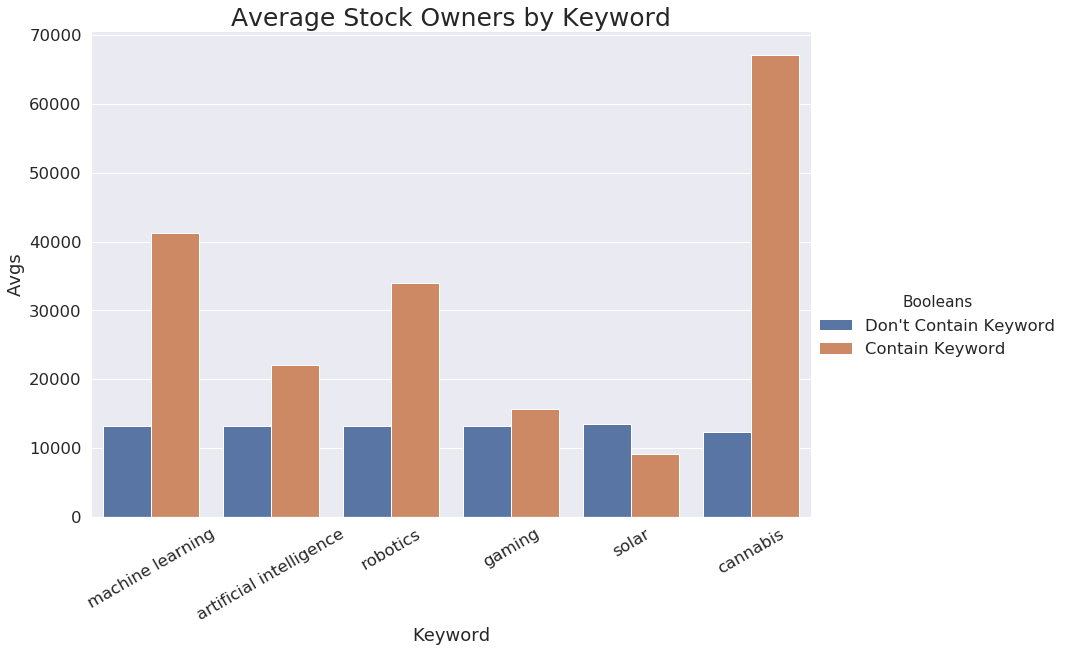

In [6]:
keywords = ["machine learning", "artificial intelligence",
            "robotics", "gaming", "solar", "cannabis"]

avgs = []
bools = []
kwds = np.repeat(keywords, 2)

for keyword in keywords:
    avgs.append(rh.groupby(keyword)["Popularity"].mean()[0])
    bools.append("Don't Contain Keyword")
    avgs.append(rh.groupby(keyword)["Popularity"].mean()[1])
    bools.append("Contain Keyword")
    
kw_dict = {"Keyword": kwds, 
          "Booleans": bools,
          "Avgs": avgs}

keyword_df = pd.DataFrame(kw_dict)

g = sns.factorplot(x='Keyword', y='Avgs', hue='Booleans',
            data=keyword_df, kind='bar', size=8, aspect = 1.5)

axes = g.axes.flatten()
axes[0].set_title("Average Stock Owners by Keyword", fontsize=25)
    
g.set_xticklabels(rotation=30)

As we can see, they all had a positive impact on the popularity of a stock, other than "solar". The word "cannabis" had the greatest impact on a stock's popularity, with around a 600% increase in users that own the stock.

Then I decided to see if age of the CEO had anything to do with the popularity of a stock on Robinhood. Unfortunaly, as you can see below, I was not able to find much significance in this variable as a predictor, although there was a slight uptrend.

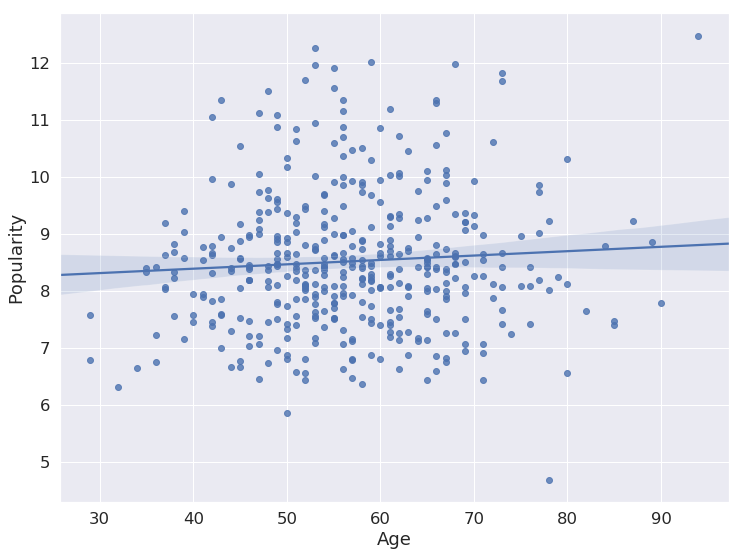

In [7]:
rh["Age"] = pd.to_numeric(rh["CEO_age"], errors="coerce")
sns.regplot(x=rh["Age"], y=np.log(rh["Popularity"]))

Then I decided to see if analyst ratings seemed to influence Robinhood user's liklihood of purchasing a stock, which as we can see from the graph below, did not seem to have much influence, if any at all.

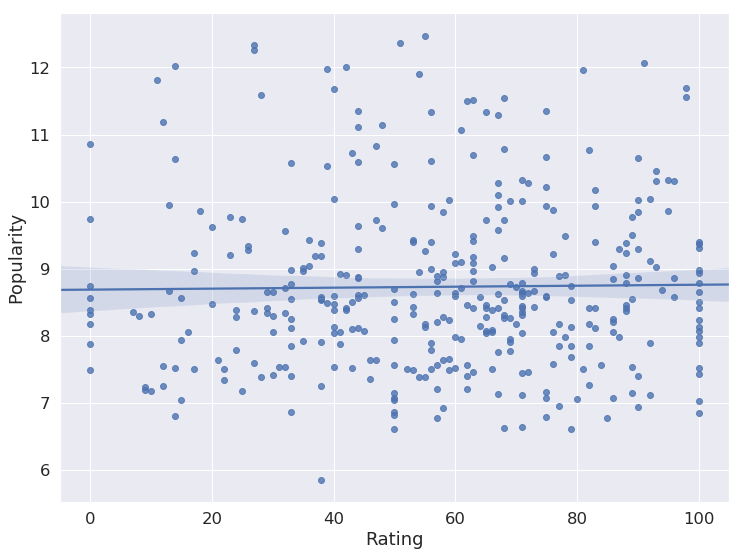

In [8]:
sns.regplot(x=rh["Rating"], y=np.log(rh["Popularity"]))

The last thing that I looked into was seeing if stock tickers that were English words were more popular on average. I figured that the names might be more appealing to someone looking at investing in them. As you can see by the (log-transformed) boxplots below, it looks like English words do have a greater popularity, and this is confirmed by the means below. We can see that stocks with English words as tickers had an average of 6000 more owners than those without English word stock tickers.

English_Word
False    12091.006085
True     18092.689922
Name: Popularity, dtype: float64

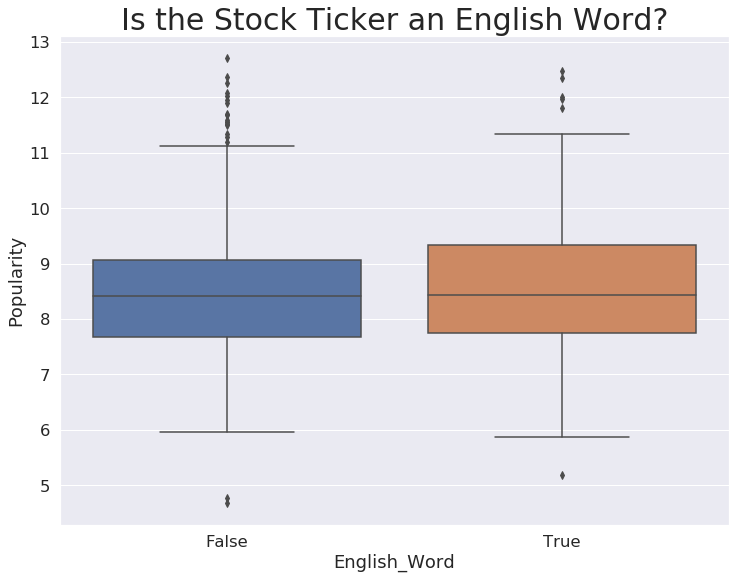

In [11]:
log_transformed_pop = np.log(rh["Popularity"])
p = sns.boxplot(x="English_Word", y=log_transformed_pop, data=rh)
p.axes.set_title("Is the Stock Ticker an English Word?",fontsize=30)

rh.groupby("English_Word")["Popularity"].mean()